In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def nba_copy():
    return pd.read_csv("../data/nba.csv").copy()

In [3]:
nba = pd.read_csv("../data/nba.csv")
nba.sample(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
262,Mike Conley,Memphis Grizzlies,11.0,PG,28.0,6-1,175.0,Ohio State,9588426.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
40,Kristaps Porzingis,New York Knicks,6.0,PF,20.0,7-3,240.0,NaN,4131720.0
242,Trevor Ariza,Houston Rockets,1.0,SF,30.0,6-8,215.0,UCLA,8193030.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0


In [4]:
nba.isna().any()

Name        True
Team        True
Number      True
Position    True
Age         True
Height      True
Weight      True
College     True
Salary      True
dtype: bool

In [5]:
nba["Name"].isna().values.sum()

1

In [6]:
nba.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [7]:
nba.isnull().sum().sum()

104

In [8]:
nba.isna().values.sum()

104

In [9]:
nba.isnull().values.sum()

104

In [10]:
nba_db = nba_copy()

In [11]:
nba_db.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [12]:
nba_db.isna().sum().sum()

104

In [13]:
nba_db.dropna(how='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [14]:
nba_db.dropna(subset=["College"])

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0


In [15]:
nba_db['College'].dtype

dtype('O')

In [16]:
total_nan_values = nba_db.isna().sum().sum()
if total_nan_values > 0:
    nba_db.dropna(subset=["Age"], inplace=True)

In [17]:
nba_db['Age'].dtype

dtype('float64')

In [18]:
nba_db['Age'].hasnans

False

In [19]:
nba_db['Age'] = nba_db['Age'].astype(int)

In [20]:
nba_db['Age']

0      25
1      25
2      27
3      22
4      29
       ..
452    20
453    26
454    24
455    26
456    26
Name: Age, Length: 457, dtype: int64

In [21]:
nba_db['College']

0                  Texas
1              Marquette
2      Boston University
3          Georgia State
4                    NaN
             ...        
452             Kentucky
453               Butler
454                  NaN
455                  NaN
456               Kansas
Name: College, Length: 457, dtype: object

#### get the indexes for all rows containing NaN values in a specific column

In [22]:
nba_db.index[pd.isnull(nba_db['Name'])]

Int64Index([], dtype='int64')

In [23]:
nba_db['College'].isna()

0      False
1      False
2      False
3      False
4       True
       ...  
452    False
453    False
454     True
455     True
456    False
Name: College, Length: 457, dtype: bool

In [24]:
nba_db['Salary'].isna().sum()

11

In [25]:
# nba_db['Salary'] = nba_db['Salary'].fillna(nba_db['Salary'].mean())

In [31]:
nba_db['Salary'].fillna(nba_db['Salary'].mean())

0      7.730337e+06
1      6.796117e+06
2      4.842684e+06
3      1.148640e+06
4      5.000000e+06
           ...     
452    2.239800e+06
453    2.433333e+06
454    9.000000e+05
455    2.900000e+06
456    9.472760e+05
Name: Salary, Length: 457, dtype: float64

In [38]:
nba_db['Salary'] = nba_db['Salary'].fillna(nba_db['Salary'].mean()).astype(int)

In [39]:
nba_db['Salary']

0      7730337
1      6796117
2      4842684
3      1148640
4      5000000
        ...   
452    2239800
453    2433333
454     900000
455    2900000
456     947276
Name: Salary, Length: 457, dtype: int64

In [40]:
nba_db.dtypes

Name         object
Team         object
Number      float64
Position     object
Age           int64
Height       object
Weight      float64
College      object
Salary        int64
dtype: object

In [43]:
nba_db['Position'].nunique()

5

In [47]:
nba_db.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25,6-2,180.0,Texas,7730337
1,Jae Crowder,Boston Celtics,99.0,SF,25,6-6,235.0,Marquette,6796117
2,John Holland,Boston Celtics,30.0,SG,27,6-5,205.0,Boston University,4842684
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6-5,185.0,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6-10,231.0,NaN,5000000


In [48]:
nba_db['Position'] = nba_db['Position'].astype('category')

In [49]:
nba_db.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25,6-2,180.0,Texas,7730337
1,Jae Crowder,Boston Celtics,99.0,SF,25,6-6,235.0,Marquette,6796117
2,John Holland,Boston Celtics,30.0,SG,27,6-5,205.0,Boston University,4842684
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6-5,185.0,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6-10,231.0,NaN,5000000


In [50]:
nba_db.dtypes

Name          object
Team          object
Number       float64
Position    category
Age            int64
Height        object
Weight       float64
College       object
Salary         int64
dtype: object

In [51]:
nba_db.sort_values(by=["Team", "Name"])

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
312,Al Horford,Atlanta Hawks,15.0,C,30,6-10,245.0,Florida,12000000
318,Dennis Schroder,Atlanta Hawks,17.0,PG,22,6-1,172.0,NaN,1763400
323,Jeff Teague,Atlanta Hawks,0.0,PG,27,6-2,186.0,Wake Forest,8000000
309,Kent Bazemore,Atlanta Hawks,24.0,SF,26,6-5,201.0,Old Dominion,2000000
311,Kirk Hinrich,Atlanta Hawks,12.0,SG,35,6-4,190.0,Kansas,2854940
...,...,...,...,...,...,...,...,...,...
381,Marcus Thornton,Washington Wizards,15.0,SF,29,6-4,205.0,LSU,200600
376,Markieff Morris,Washington Wizards,5.0,PF,26,6-10,245.0,Kansas,8000000
375,Nene Hilario,Washington Wizards,42.0,C,33,6-11,250.0,NaN,13000000
378,Otto Porter Jr.,Washington Wizards,22.0,SF,23,6-8,198.0,Georgetown,4662960


In [52]:
nba_db.sort_values(by=["Team", "Name"], ascending=[True, False])

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
322,Walter Tavares,Atlanta Hawks,22.0,C,24,7-3,260.0,NaN,1000000
310,Tim Hardaway Jr.,Atlanta Hawks,10.0,SG,24,6-6,205.0,Michigan,1304520
321,Tiago Splitter,Atlanta Hawks,11.0,C,31,6-11,245.0,NaN,9756250
320,Thabo Sefolosha,Atlanta Hawks,25.0,SF,32,6-7,220.0,NaN,4000000
315,Paul Millsap,Atlanta Hawks,4.0,PF,31,6-8,246.0,Louisiana Tech,18671659
...,...,...,...,...,...,...,...,...,...
374,JJ Hickson,Washington Wizards,21.0,C,27,6-9,242.0,North Carolina State,273038
380,Garrett Temple,Washington Wizards,17.0,SG,30,6-6,195.0,LSU,1100602
372,Drew Gooden,Washington Wizards,90.0,PF,34,6-10,250.0,Kansas,3300000
369,Bradley Beal,Washington Wizards,3.0,SG,22,6-5,207.0,Florida,5694674


In [53]:
nba_db = nba_db.sort_values(by=["Team", "Name"])
nba_db

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
312,Al Horford,Atlanta Hawks,15.0,C,30,6-10,245.0,Florida,12000000
318,Dennis Schroder,Atlanta Hawks,17.0,PG,22,6-1,172.0,NaN,1763400
323,Jeff Teague,Atlanta Hawks,0.0,PG,27,6-2,186.0,Wake Forest,8000000
309,Kent Bazemore,Atlanta Hawks,24.0,SF,26,6-5,201.0,Old Dominion,2000000
311,Kirk Hinrich,Atlanta Hawks,12.0,SG,35,6-4,190.0,Kansas,2854940
...,...,...,...,...,...,...,...,...,...
381,Marcus Thornton,Washington Wizards,15.0,SF,29,6-4,205.0,LSU,200600
376,Markieff Morris,Washington Wizards,5.0,PF,26,6-10,245.0,Kansas,8000000
375,Nene Hilario,Washington Wizards,42.0,C,33,6-11,250.0,NaN,13000000
378,Otto Porter Jr.,Washington Wizards,22.0,SF,23,6-8,198.0,Georgetown,4662960


In [54]:
nba_db.sort_index()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25,6-2,180.0,Texas,7730337
1,Jae Crowder,Boston Celtics,99.0,SF,25,6-6,235.0,Marquette,6796117
2,John Holland,Boston Celtics,30.0,SG,27,6-5,205.0,Boston University,4842684
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6-5,185.0,Georgia State,1148640
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6-10,231.0,NaN,5000000
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20,6-10,234.0,Kentucky,2239800
453,Shelvin Mack,Utah Jazz,8.0,PG,26,6-3,203.0,Butler,2433333
454,Raul Neto,Utah Jazz,25.0,PG,24,6-1,179.0,NaN,900000
455,Tibor Pleiss,Utah Jazz,21.0,C,26,7-3,256.0,NaN,2900000


In [62]:
salary_rank = nba_db['Salary'].rank(ascending=False)

In [71]:
salary_percentile = nba_db['Salary'].rank(ascending=False, pct=True)

In [68]:
nba_db.insert(loc=(nba_db.shape[1]), column="Salary Rank", value=salary_rank)

In [72]:
nba_db.insert(loc=nba_db.shape[1], column="Salary Percentile", value= salary_percentile)

In [73]:
nba_db

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Salary Rank,Salary Percentile
312,Al Horford,Atlanta Hawks,15.0,C,30,6-10,245.0,Florida,12000000,57.0,0.124726
318,Dennis Schroder,Atlanta Hawks,17.0,PG,22,6-1,172.0,NaN,1763400,284.0,0.621444
323,Jeff Teague,Atlanta Hawks,0.0,PG,27,6-2,186.0,Wake Forest,8000000,93.0,0.203501
309,Kent Bazemore,Atlanta Hawks,24.0,SF,26,6-5,201.0,Old Dominion,2000000,277.0,0.606127
311,Kirk Hinrich,Atlanta Hawks,12.0,SG,35,6-4,190.0,Kansas,2854940,231.0,0.505470
...,...,...,...,...,...,...,...,...,...,...,...
381,Marcus Thornton,Washington Wizards,15.0,SF,29,6-4,205.0,LSU,200600,445.0,0.973742
376,Markieff Morris,Washington Wizards,5.0,PF,26,6-10,245.0,Kansas,8000000,93.0,0.203501
375,Nene Hilario,Washington Wizards,42.0,C,33,6-11,250.0,NaN,13000000,48.5,0.106127
378,Otto Porter Jr.,Washington Wizards,22.0,SF,23,6-8,198.0,Georgetown,4662960,163.0,0.356674


In [75]:
nba_db['Age'].value_counts()

24    47
25    45
27    41
23    41
26    36
30    31
28    31
29    28
22    26
31    22
21    19
20    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: Age, dtype: int64

In [81]:
nba_db['Position'].value_counts()

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

<Axes: >

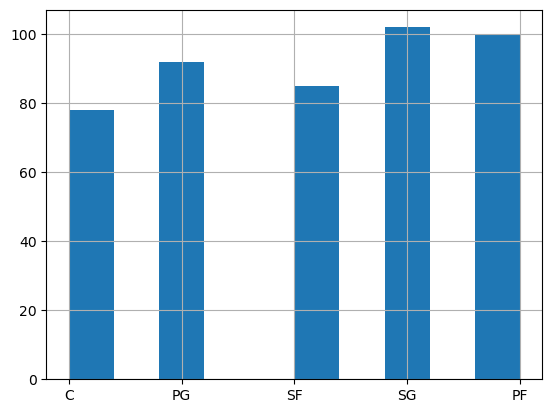

In [78]:
nba_db['Position'].hist()